<a href="https://colab.research.google.com/github/SarsijNayan/Deprivation_map_of_India/blob/main/deprivaton_index_of_india.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install geopandas matplotlib pandas shapely matplotlib-scalebar gdown


In [ ]:
pip install geopandas pandas matplotlib shapely matplotlib-scalebar gdown


In [ ]:
import gdown

# Google Drive file ID of the CSV
csv_url = "https://drive.google.com/uc?id=17-2eg9mJBLxd-oLHTqHxdlgNWW_UG-cQ"
gdown.download(csv_url, "filtered_geocoded_data.csv", quiet=False)

print("✅ CSV file downloaded successfully!")


Downloading...
From: https://drive.google.com/uc?id=17-2eg9mJBLxd-oLHTqHxdlgNWW_UG-cQ
To: /content/filtered_geocoded_data.csv
100%|██████████| 164k/164k [00:00<00:00, 50.5MB/s]

✅ CSV file downloaded successfully!


In [ ]:
import gdown
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import matplotlib.font_manager as fm
from matplotlib_scalebar.scalebar import ScaleBar

# Download India boundary GeoJSON
india_boundary_url = "https://drive.google.com/uc?id=1kOUtAzlfu852ROlO4vRDkBxkioLd9-8b"
gdown.download(india_boundary_url, "India_Boundary.geojson", quiet=False)

# Download State boundaries GeoJSON
state_boundary_url = "https://drive.google.com/uc?id=1ffd4lhURVLqDCLyv8fLKufjbmxo_Dgsq"
gdown.download(state_boundary_url, "India_States.geojson", quiet=False)

# Load India and state boundaries
india_boundary = gpd.read_file("India_Boundary.geojson")
state_boundaries = gpd.read_file("India_States.geojson")




Downloading...
From: https://drive.google.com/uc?id=1kOUtAzlfu852ROlO4vRDkBxkioLd9-8b
To: /content/India_Boundary.geojson
100%|██████████| 10.8M/10.8M [00:00<00:00, 83.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ffd4lhURVLqDCLyv8fLKufjbmxo_Dgsq
To: /content/India_States.geojson
100%|██████████| 46.9M/46.9M [00:00<00:00, 93.6MB/s]


FileNotFoundError: [Errno 2] No such file or directory: 'filtered_geocoded_data.csv'

<ipython-input-6-194f68fd9adf>:61: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


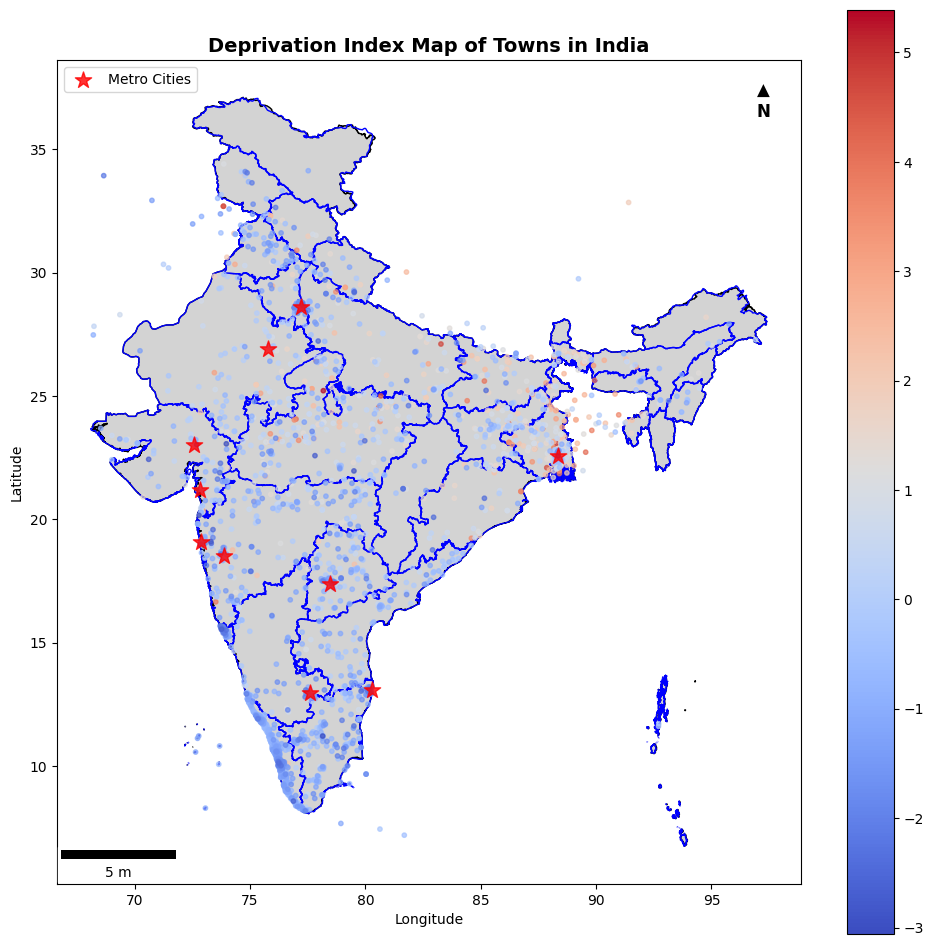

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import matplotlib.font_manager as fm
from matplotlib_scalebar.scalebar import ScaleBar

# Load India boundary and state boundary GeoJSON files
india_boundary = gpd.read_file("India_Boundary.geojson")
state_boundaries = gpd.read_file("India_States.geojson")

# Load the geocoded towns data
df = pd.read_csv("filtered_geocoded_data.csv")
df.rename(columns={'Index': 'deprivation_index'}, inplace=True)  # Ensure correct column name

# Convert town data to GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Metro Cities Data
metro_data = {
    "City": ["Delhi", "Mumbai", "Kolkata", "Chennai", "Bengaluru", "Hyderabad", "Ahmedabad", "Pune", "Surat", "Jaipur"],
    "Latitude": [28.6139, 19.0760, 22.5726, 13.0827, 12.9716, 17.3850, 23.0225, 18.5204, 21.1702, 26.9124],
    "Longitude": [77.2090, 72.8777, 88.3639, 80.2707, 77.5946, 78.4867, 72.5714, 73.8567, 72.8311, 75.7873]
}
metro_df = pd.DataFrame(metro_data)

# Convert metro cities to GeoDataFrame
metro_geometry = [Point(xy) for xy in zip(metro_df['Longitude'], metro_df['Latitude'])]
metro_gdf = gpd.GeoDataFrame(metro_df, geometry=metro_geometry, crs="EPSG:4326")

# Plot the Map
fig, ax = plt.subplots(figsize=(12, 12))

# Plot India boundary
india_boundary.plot(ax=ax, color="lightgray", edgecolor="black", linewidth=1, label="India Boundary")

# Plot State boundaries
state_boundaries.plot(ax=ax, color="none", edgecolor="blue", linewidth=1, linestyle="-", label="State Boundaries")

# Plot towns with deprivation index colors
gdf.plot(ax=ax, column='deprivation_index', cmap='coolwarm', markersize=10, legend=True, alpha=0.7)

# Plot metro cities as red stars
metro_gdf.plot(ax=ax, marker='*', color='red', markersize=150, label="Metro Cities", alpha=0.8)

# Add labels
font = fm.FontProperties(weight='bold')
plt.title("Deprivation Index Map of Towns in India", fontproperties=font, fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Add a north arrow
ax.text(0.95, 0.95, u'\u25B2\nN', transform=ax.transAxes, ha='center', va='center', fontsize=12, fontweight='bold')

# Add scale bar
scalebar = ScaleBar(1, location='lower left')
ax.add_artist(scalebar)

# Add legend
plt.legend()

plt.show()


<ipython-input-7-32a62131b495>:33: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


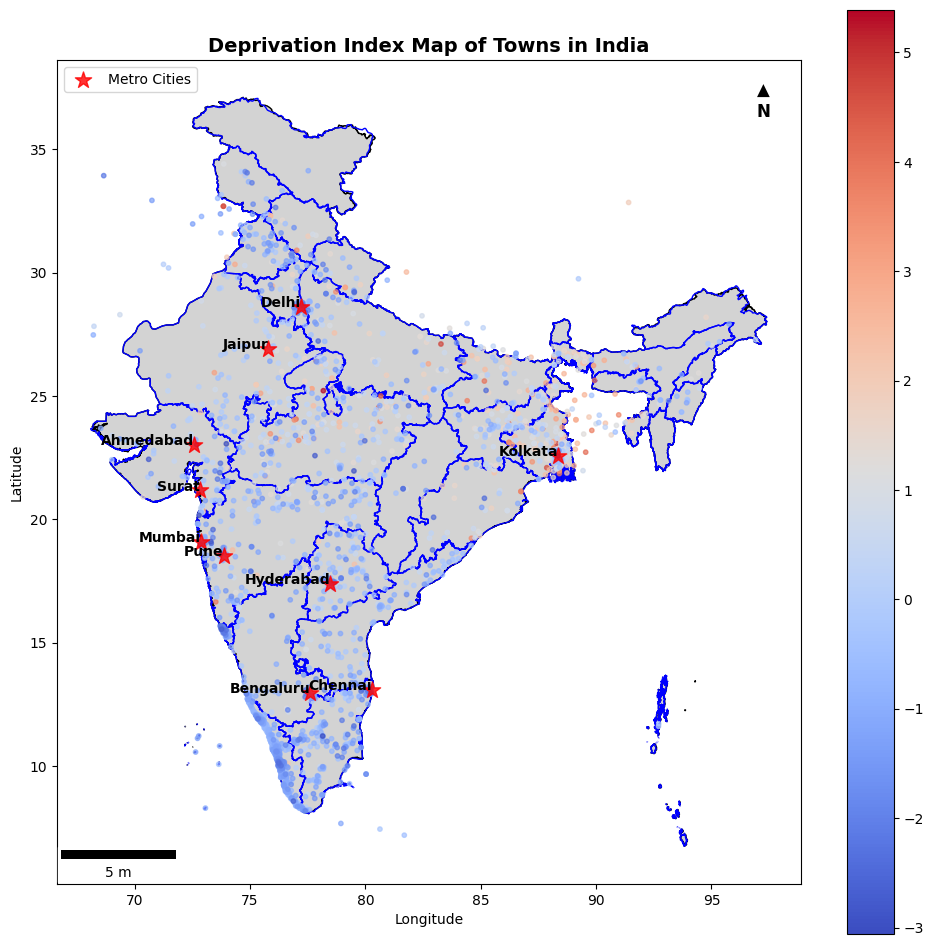

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

# Plot India boundary
india_boundary.plot(ax=ax, color="lightgray", edgecolor="black", linewidth=1, label="India Boundary")

# Plot State boundaries
state_boundaries.plot(ax=ax, color="none", edgecolor="blue", linewidth=1, linestyle="-", label="State Boundaries")

# Plot towns with deprivation index colors
gdf.plot(ax=ax, column='deprivation_index', cmap='coolwarm', markersize=10, legend=True, alpha=0.7)

# Plot metro cities as red stars
metro_gdf.plot(ax=ax, marker='*', color='red', markersize=150, label="Metro Cities", alpha=0.8)

# Add Metro City Labels
for idx, row in metro_df.iterrows():
    ax.text(row["Longitude"], row["Latitude"], row["City"], fontsize=10, color="black", ha="right", fontweight="bold")

# Add labels
font = fm.FontProperties(weight='bold')
plt.title("Deprivation Index Map of Towns in India", fontproperties=font, fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Add a north arrow
ax.text(0.95, 0.95, u'\u25B2\nN', transform=ax.transAxes, ha='center', va='center', fontsize=12, fontweight='bold')

# Add scale bar
scalebar = ScaleBar(1, location='lower left')
ax.add_artist(scalebar)

# Add legend
plt.legend()

plt.show()


In [ ]:
gdf.to_csv("final_geocoded_towns.csv", index=False)
print("✅ Data exported as 'final_geocoded_towns.csv'")


✅ Data exported as 'final_geocoded_towns.csv'


In [ ]:
from google.colab import files

# Save processed data
gdf.to_csv("final_geocoded_towns.csv", index=False)

# Download file
files.download("final_geocoded_towns.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the figure as PDF and JPEG in high resolution
fig.savefig("deprivation_index_map.pdf", format="pdf", dpi=600, bbox_inches="tight")
fig.savefig("deprivation_index_map.jpeg", format="jpeg", dpi=600, bbox_inches="tight")

print("✅ Map saved as 'deprivation_index_map.pdf' and 'deprivation_index_map.jpeg'.")


/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


✅ Map saved as 'deprivation_index_map.pdf' and 'deprivation_index_map.jpeg'.


In [ ]:
from google.colab import files

# Download the files
files.download("deprivation_index_map.pdf")
files.download("deprivation_index_map.jpeg")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.ticker as mticker

# Add major and minor grid lines
ax.set_xticks(range(int(gdf.longitude.min()), int(gdf.longitude.max()) + 1, 2))  # Longitude grid every 2 degrees
ax.set_yticks(range(int(gdf.latitude.min()), int(gdf.latitude.max()) + 1, 2))  # Latitude grid every 2 degrees

ax.xaxis.set_major_locator(mticker.MultipleLocator(2))  # Major grid every 2 degrees
ax.yaxis.set_major_locator(mticker.MultipleLocator(2))

ax.xaxis.set_minor_locator(mticker.MultipleLocator(1))  # Minor grid every 1 degree
ax.yaxis.set_minor_locator(mticker.MultipleLocator(1))

ax.grid(True, which="major", linestyle="--", linewidth=0.8, alpha=0.7, color="gray")  # Major grid (dashed)
ax.grid(True, which="minor", linestyle=":", linewidth=0.5, alpha=0.5, color="lightgray")  # Minor grid (dotted)

# Save high-resolution map
fig.savefig("deprivation_index_map.pdf", format="pdf", dpi=600, bbox_inches="tight")
fig.savefig("deprivation_index_map.jpeg", format="jpeg", dpi=600, bbox_inches="tight")

print("✅ Map saved with enhanced grid as 'deprivation_index_map.pdf' and 'deprivation_index_map.jpeg'.")


/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


✅ Map saved with enhanced grid as 'deprivation_index_map.pdf' and 'deprivation_index_map.jpeg'.


<ipython-input-13-461195c44c7a>:46: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


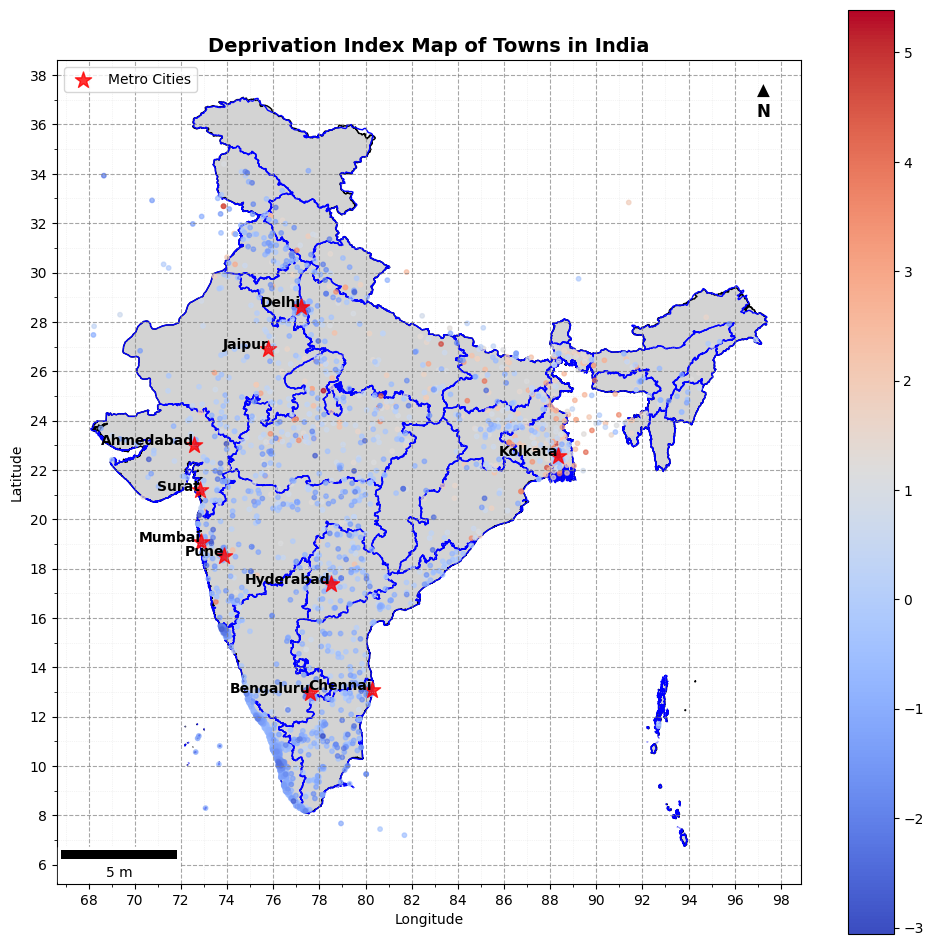

✅ Map saved as 'deprivation_index_map.pdf' and 'deprivation_index_map.jpeg'.


In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

# Plot India boundary
india_boundary.plot(ax=ax, color="lightgray", edgecolor="black", linewidth=1, label="India Boundary")

# Plot State boundaries
state_boundaries.plot(ax=ax, color="none", edgecolor="blue", linewidth=1, linestyle="-", label="State Boundaries")

# Plot towns with deprivation index colors
gdf.plot(ax=ax, column='deprivation_index', cmap='coolwarm', markersize=10, legend=True, alpha=0.7)

# Plot metro cities as red stars
metro_gdf.plot(ax=ax, marker='*', color='red', markersize=150, label="Metro Cities", alpha=0.8)

# Add Metro City Labels
for idx, row in metro_df.iterrows():
    ax.text(row["Longitude"], row["Latitude"], row["City"], fontsize=10, color="black", ha="right", fontweight="bold")

# Add major and minor grid lines
ax.set_xticks(range(int(gdf.longitude.min()), int(gdf.longitude.max()) + 1, 2))  # Longitude grid every 2 degrees
ax.set_yticks(range(int(gdf.latitude.min()), int(gdf.latitude.max()) + 1, 2))  # Latitude grid every 2 degrees

ax.xaxis.set_major_locator(mticker.MultipleLocator(2))  # Major grid every 2 degrees
ax.yaxis.set_major_locator(mticker.MultipleLocator(2))

ax.xaxis.set_minor_locator(mticker.MultipleLocator(1))  # Minor grid every 1 degree
ax.yaxis.set_minor_locator(mticker.MultipleLocator(1))

ax.grid(True, which="major", linestyle="--", linewidth=0.8, alpha=0.7, color="gray")  # Major grid (dashed)
ax.grid(True, which="minor", linestyle=":", linewidth=0.5, alpha=0.5, color="lightgray")  # Minor grid (dotted)

# Add labels
font = fm.FontProperties(weight='bold')
plt.title("Deprivation Index Map of Towns in India", fontproperties=font, fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Add a north arrow
ax.text(0.95, 0.95, u'\u25B2\nN', transform=ax.transAxes, ha='center', va='center', fontsize=12, fontweight='bold')

# Add scale bar
scalebar = ScaleBar(1, location='lower left')
ax.add_artist(scalebar)

# Add legend
plt.legend()

# Save high-resolution map
fig.savefig("deprivation_index_map.pdf", format="pdf", dpi=600, bbox_inches="tight")
fig.savefig("deprivation_index_map.jpeg", format="jpeg", dpi=600, bbox_inches="tight")

# Show the map
plt.show()

print("✅ Map saved as 'deprivation_index_map.pdf' and 'deprivation_index_map.jpeg'.")


/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


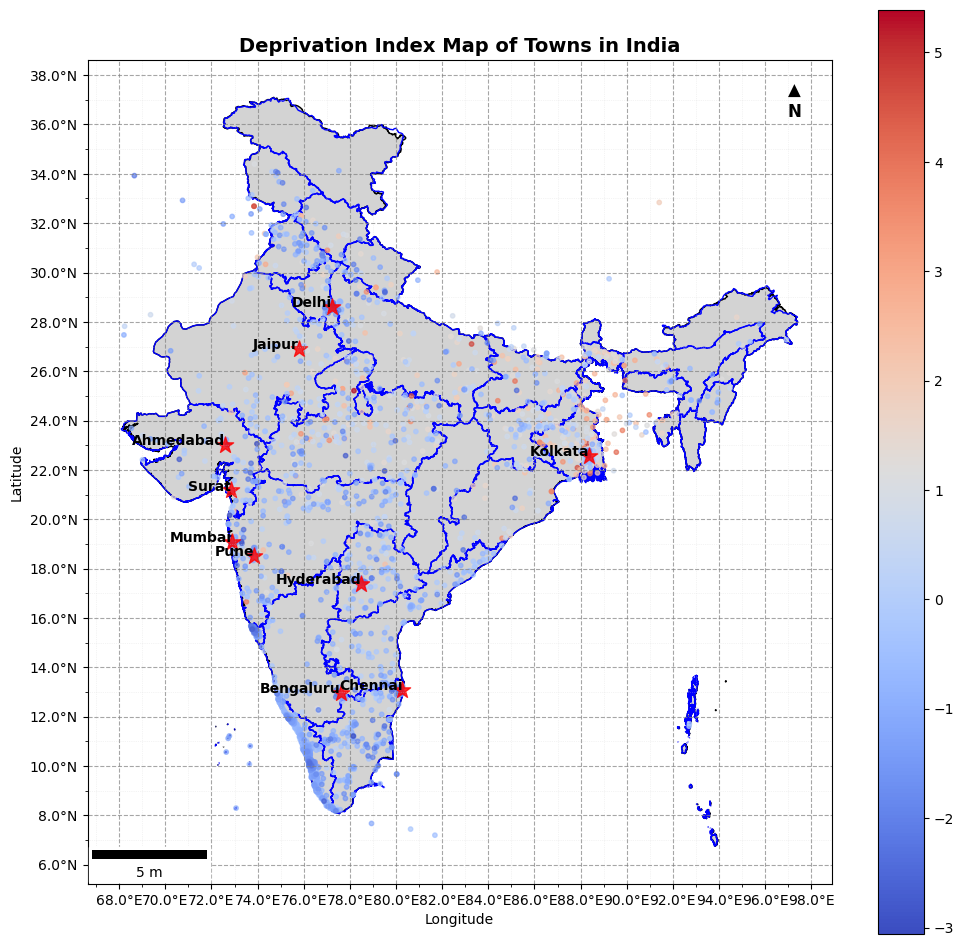

✅ Map saved as 'deprivation_index_map.pdf' and 'deprivation_index_map.jpeg'.


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import matplotlib.font_manager as fm
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.ticker as mticker

# Load India boundary & state boundary
india_boundary = gpd.read_file("India_Boundary.geojson")
state_boundaries = gpd.read_file("India_States.geojson")

# Load geocoded towns data
df = pd.read_csv("filtered_geocoded_data.csv")
df.rename(columns={'Index': 'deprivation_index'}, inplace=True)

# Convert towns data to a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Metro Cities Data
metro_data = {
    "City": ["Delhi", "Mumbai", "Kolkata", "Chennai", "Bengaluru", "Hyderabad", "Ahmedabad", "Pune", "Surat", "Jaipur"],
    "Latitude": [28.6139, 19.0760, 22.5726, 13.0827, 12.9716, 17.3850, 23.0225, 18.5204, 21.1702, 26.9124],
    "Longitude": [77.2090, 72.8777, 88.3639, 80.2707, 77.5946, 78.4867, 72.5714, 73.8567, 72.8311, 75.7873]
}
metro_df = pd.DataFrame(metro_data)
metro_geometry = [Point(xy) for xy in zip(metro_df['Longitude'], metro_df['Latitude'])]
metro_gdf = gpd.GeoDataFrame(metro_df, geometry=metro_geometry, crs="EPSG:4326")

# Plot the map
fig, ax = plt.subplots(figsize=(12, 12))

# Plot boundaries
india_boundary.plot(ax=ax, color="lightgray", edgecolor="black", linewidth=1)
state_boundaries.plot(ax=ax, color="none", edgecolor="blue", linewidth=1, linestyle="-")

# Plot deprivation index towns
gdf.plot(ax=ax, column='deprivation_index', cmap='coolwarm', markersize=10, legend=True, alpha=0.7)

# Plot metro cities
metro_gdf.plot(ax=ax, marker='*', color='red', markersize=150, label="Metro Cities", alpha=0.8)

# Label metro cities
for idx, row in metro_df.iterrows():
    ax.text(row["Longitude"], row["Latitude"], row["City"], fontsize=10, color="black", ha="right", fontweight="bold")

# Format longitude labels
def format_longitude(x, pos):
    if x > 0:
        return f"{abs(x)}°E"
    elif x < 0:
        return f"{abs(x)}°W"
    return f"{abs(x)}°"

# Format latitude labels
def format_latitude(y, pos):
    if y > 0:
        return f"{abs(y)}°N"
    elif y < 0:
        return f"{abs(y)}°S"
    return f"{abs(y)}°"

# Apply grid styling
ax.xaxis.set_major_locator(mticker.MultipleLocator(2))
ax.yaxis.set_major_locator(mticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(mticker.MultipleLocator(1))
ax.yaxis.set_minor_locator(mticker.MultipleLocator(1))

ax.xaxis.set_major_formatter(mticker.FuncFormatter(format_longitude))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_latitude))

ax.grid(True, which="major", linestyle="--", linewidth=0.8, alpha=0.7, color="gray")
ax.grid(True, which="minor", linestyle=":", linewidth=0.5, alpha=0.5, color="lightgray")

# Add labels
font = fm.FontProperties(weight='bold')
plt.title("Deprivation Index Map of Towns in India", fontproperties=font, fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Add north arrow
ax.text(0.95, 0.95, u'\u25B2\nN', transform=ax.transAxes, ha='center', va='center', fontsize=12, fontweight='bold')

# Add scale bar
scalebar = ScaleBar(1, location='lower left')
ax.add_artist(scalebar)

# Save high-resolution map
fig.savefig("deprivation_index_map.pdf", format="pdf", dpi=600, bbox_inches="tight")
fig.savefig("deprivation_index_map.jpeg", format="jpeg", dpi=600, bbox_inches="tight")

# Show the map
plt.show()

print("✅ Map saved as 'deprivation_index_map.pdf' and 'deprivation_index_map.jpeg'.")


/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


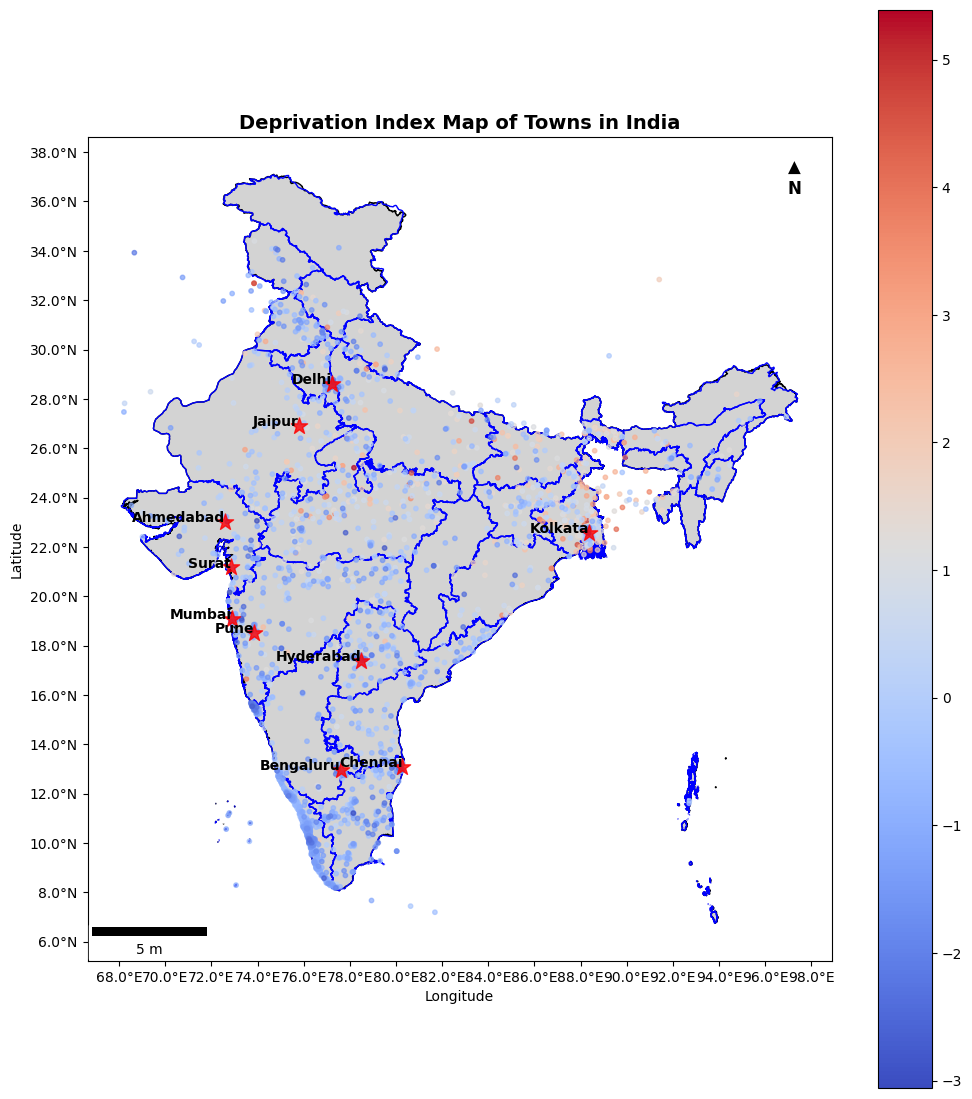

✅ Map saved as 'deprivation_index_map.pdf' and 'deprivation_index_map.jpeg'.


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import matplotlib.font_manager as fm
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.ticker as mticker

# Load India boundary & state boundary
india_boundary = gpd.read_file("India_Boundary.geojson")
state_boundaries = gpd.read_file("India_States.geojson")

# Load geocoded towns data
df = pd.read_csv("filtered_geocoded_data.csv")
df.rename(columns={'Index': 'deprivation_index'}, inplace=True)

# Convert towns data to a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Metro Cities Data
metro_data = {
    "City": ["Delhi", "Mumbai", "Kolkata", "Chennai", "Bengaluru", "Hyderabad", "Ahmedabad", "Pune", "Surat", "Jaipur"],
    "Latitude": [28.6139, 19.0760, 22.5726, 13.0827, 12.9716, 17.3850, 23.0225, 18.5204, 21.1702, 26.9124],
    "Longitude": [77.2090, 72.8777, 88.3639, 80.2707, 77.5946, 78.4867, 72.5714, 73.8567, 72.8311, 75.7873]
}
metro_df = pd.DataFrame(metro_data)
metro_geometry = [Point(xy) for xy in zip(metro_df['Longitude'], metro_df['Latitude'])]
metro_gdf = gpd.GeoDataFrame(metro_df, geometry=metro_geometry, crs="EPSG:4326")

# Plot the map
fig, ax = plt.subplots(figsize=(12, 14))  # Adjusted figure size to add space at the bottom

# Plot boundaries
india_boundary.plot(ax=ax, color="lightgray", edgecolor="black", linewidth=1)
state_boundaries.plot(ax=ax, color="none", edgecolor="blue", linewidth=1, linestyle="-")

# Plot deprivation index towns
gdf.plot(ax=ax, column='deprivation_index', cmap='coolwarm', markersize=10, legend=True, alpha=0.7)

# Plot metro cities
metro_gdf.plot(ax=ax, marker='*', color='red', markersize=150, label="Metro Cities", alpha=0.8)

# Label metro cities
for idx, row in metro_df.iterrows():
    ax.text(row["Longitude"], row["Latitude"], row["City"], fontsize=10, color="black", ha="right", fontweight="bold")

# Format longitude labels
def format_longitude(x, pos):
    if x > 0:
        return f"{abs(x)}°E"
    elif x < 0:
        return f"{abs(x)}°W"
    return f"{abs(x)}°"

# Format latitude labels
def format_latitude(y, pos):
    if y > 0:
        return f"{abs(y)}°N"
    elif y < 0:
        return f"{abs(y)}°S"
    return f"{abs(y)}°"

# Apply latitude/longitude labels without grid
ax.xaxis.set_major_locator(mticker.MultipleLocator(2))
ax.yaxis.set_major_locator(mticker.MultipleLocator(2))
ax.xaxis.set_major_formatter(mticker.FuncFormatter(format_longitude))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_latitude))

# Remove default grid
ax.grid(False)

# Add labels
font = fm.FontProperties(weight='bold')
plt.title("Deprivation Index Map of Towns in India", fontproperties=font, fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Add north arrow
ax.text(0.95, 0.95, u'\u25B2\nN', transform=ax.transAxes, ha='center', va='center', fontsize=12, fontweight='bold')

# Add scale bar
scalebar = ScaleBar(1, location='lower left')
ax.add_artist(scalebar)

# Save high-resolution map
fig.savefig("deprivation_index_map.pdf", format="pdf", dpi=600, bbox_inches="tight")
fig.savefig("deprivation_index_map.jpeg", format="jpeg", dpi=600, bbox_inches="tight")

# Show the map
plt.show()

print("✅ Map saved as 'deprivation_index_map.pdf' and 'deprivation_index_map.jpeg'.")


/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


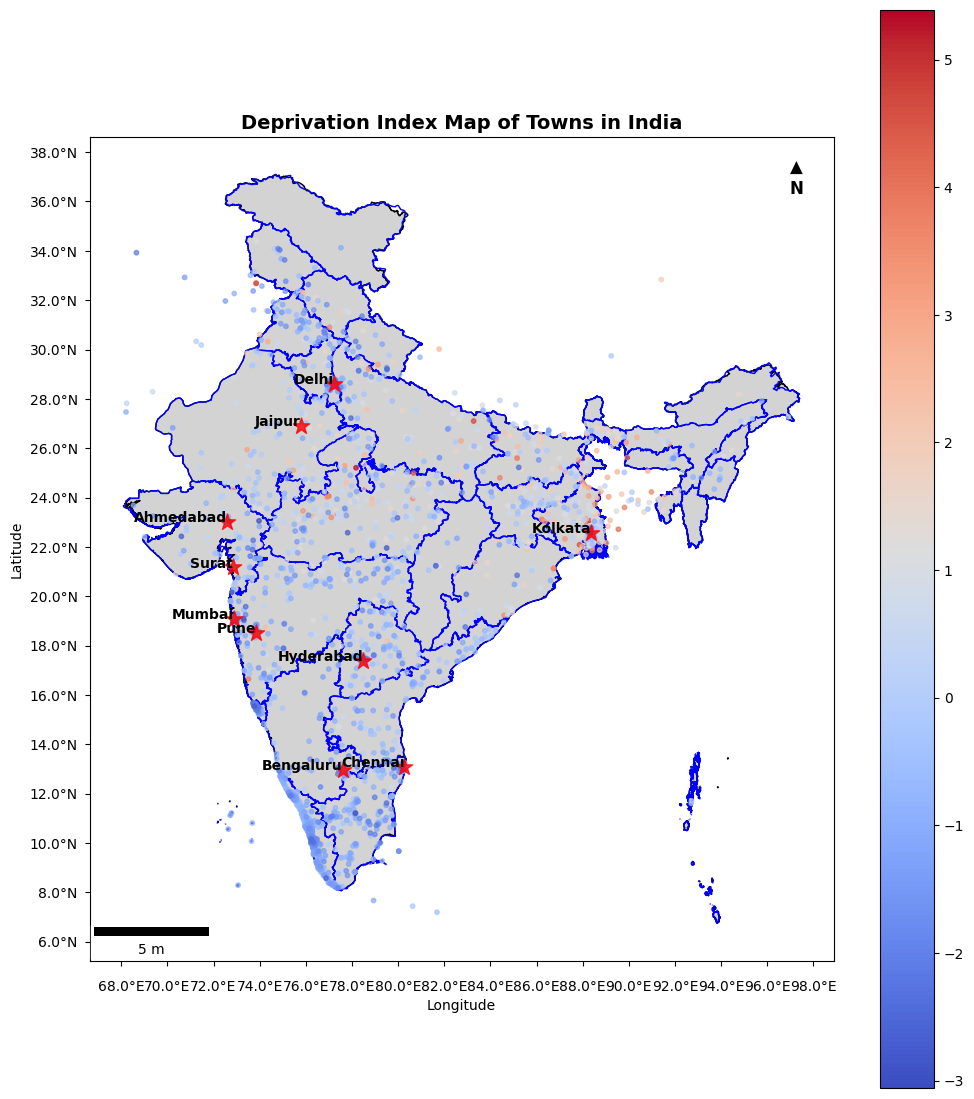

✅ Map saved as 'deprivation_index_map.pdf' and 'deprivation_index_map.jpeg'.


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import matplotlib.font_manager as fm
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.ticker as mticker

# Load India boundary & state boundary
india_boundary = gpd.read_file("India_Boundary.geojson")
state_boundaries = gpd.read_file("India_States.geojson")

# Load geocoded towns data
df = pd.read_csv("filtered_geocoded_data.csv")
df.rename(columns={'Index': 'deprivation_index'}, inplace=True)

# Convert towns data to a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Metro Cities Data
metro_data = {
    "City": ["Delhi", "Mumbai", "Kolkata", "Chennai", "Bengaluru", "Hyderabad", "Ahmedabad", "Pune", "Surat", "Jaipur"],
    "Latitude": [28.6139, 19.0760, 22.5726, 13.0827, 12.9716, 17.3850, 23.0225, 18.5204, 21.1702, 26.9124],
    "Longitude": [77.2090, 72.8777, 88.3639, 80.2707, 77.5946, 78.4867, 72.5714, 73.8567, 72.8311, 75.7873]
}
metro_df = pd.DataFrame(metro_data)
metro_geometry = [Point(xy) for xy in zip(metro_df['Longitude'], metro_df['Latitude'])]
metro_gdf = gpd.GeoDataFrame(metro_df, geometry=metro_geometry, crs="EPSG:4326")

# Plot the map
fig, ax = plt.subplots(figsize=(12, 14))  # Increased figure size for better spacing

# Plot boundaries
india_boundary.plot(ax=ax, color="lightgray", edgecolor="black", linewidth=1)
state_boundaries.plot(ax=ax, color="none", edgecolor="blue", linewidth=1, linestyle="-")

# Plot deprivation index towns
gdf.plot(ax=ax, column='deprivation_index', cmap='coolwarm', markersize=10, legend=True, alpha=0.7)

# Plot metro cities
metro_gdf.plot(ax=ax, marker='*', color='red', markersize=150, label="Metro Cities", alpha=0.8)

# Label metro cities
for idx, row in metro_df.iterrows():
    ax.text(row["Longitude"], row["Latitude"], row["City"], fontsize=10, color="black", ha="right", fontweight="bold")

# Format longitude labels with extra spacing
def format_longitude(x, pos):
    if x > 0:
        return f"{abs(x)}°E"
    elif x < 0:
        return f"{abs(x)}°W"
    return f"{abs(x)}°"

# Format latitude labels
def format_latitude(y, pos):
    if y > 0:
        return f"{abs(y)}°N"
    elif y < 0:
        return f"{abs(y)}°S"
    return f"{abs(y)}°"

# Apply latitude/longitude labels
ax.xaxis.set_major_locator(mticker.MultipleLocator(2))
ax.yaxis.set_major_locator(mticker.MultipleLocator(2))
ax.xaxis.set_major_formatter(mticker.FuncFormatter(format_longitude))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_latitude))

# Shift longitude labels downward for extra space
ax.tick_params(axis="x", pad=10)  # Increase padding for longitude labels
ax.tick_params(axis="y", pad=5)   # Increase padding for latitude labels

# Remove default grid
ax.grid(False)

# Add labels
font = fm.FontProperties(weight='bold')
plt.title("Deprivation Index Map of Towns in India", fontproperties=font, fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Add north arrow
ax.text(0.95, 0.95, u'\u25B2\nN', transform=ax.transAxes, ha='center', va='center', fontsize=12, fontweight='bold')

# Add scale bar
scalebar = ScaleBar(1, location='lower left')
ax.add_artist(scalebar)

# Save high-resolution map
fig.savefig("deprivation_index_map.pdf", format="pdf", dpi=600, bbox_inches="tight")
fig.savefig("deprivation_index_map.jpeg", format="jpeg", dpi=600, bbox_inches="tight")

# Show the map
plt.show()

print("✅ Map saved as 'deprivation_index_map.pdf' and 'deprivation_index_map.jpeg'.")


/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


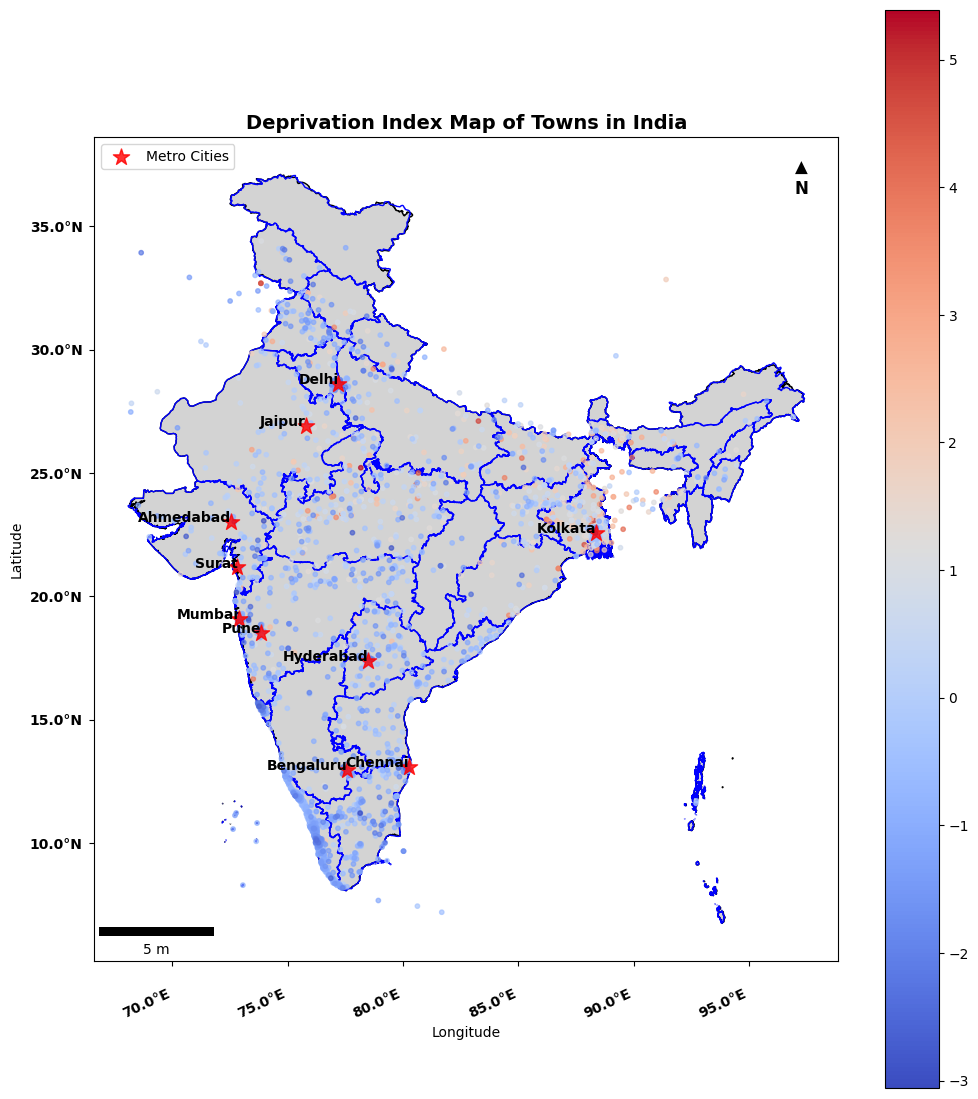

✅ Map saved as 'deprivation_index_map.pdf' and 'deprivation_index_map.jpeg'.


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import matplotlib.font_manager as fm
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.ticker as mticker

# Load India boundary & state boundary
india_boundary = gpd.read_file("India_Boundary.geojson")
state_boundaries = gpd.read_file("India_States.geojson")

# Load geocoded towns data
df = pd.read_csv("filtered_geocoded_data.csv")
df.rename(columns={'Index': 'deprivation_index'}, inplace=True)

# Convert towns data to a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Metro Cities Data
metro_data = {
    "City": ["Delhi", "Mumbai", "Kolkata", "Chennai", "Bengaluru", "Hyderabad", "Ahmedabad", "Pune", "Surat", "Jaipur"],
    "Latitude": [28.6139, 19.0760, 22.5726, 13.0827, 12.9716, 17.3850, 23.0225, 18.5204, 21.1702, 26.9124],
    "Longitude": [77.2090, 72.8777, 88.3639, 80.2707, 77.5946, 78.4867, 72.5714, 73.8567, 72.8311, 75.7873]
}
metro_df = pd.DataFrame(metro_data)
metro_geometry = [Point(xy) for xy in zip(metro_df['Longitude'], metro_df['Latitude'])]
metro_gdf = gpd.GeoDataFrame(metro_df, geometry=metro_geometry, crs="EPSG:4326")

# Plot the map
fig, ax = plt.subplots(figsize=(12, 14))  # Increased figure size for better spacing

# Plot boundaries
india_boundary.plot(ax=ax, color="lightgray", edgecolor="black", linewidth=1)
state_boundaries.plot(ax=ax, color="none", edgecolor="blue", linewidth=1, linestyle="-")

# Plot deprivation index towns
gdf.plot(ax=ax, column='deprivation_index', cmap='coolwarm', markersize=10, legend=True, alpha=0.7)

# Plot metro cities
metro_gdf.plot(ax=ax, marker='*', color='red', markersize=150, label="Metro Cities", alpha=0.8)

# Label metro cities
for idx, row in metro_df.iterrows():
    ax.text(row["Longitude"], row["Latitude"], row["City"], fontsize=10, color="black", ha="right", fontweight="bold")

# Format longitude labels with extra spacing
def format_longitude(x, pos):
    if x > 0:
        return f"{abs(x)}°E"
    elif x < 0:
        return f"{abs(x)}°W"
    return f"{abs(x)}°"

# Format latitude labels
def format_latitude(y, pos):
    if y > 0:
        return f"{abs(y)}°N"
    elif y < 0:
        return f"{abs(y)}°S"
    return f"{abs(y)}°"

# Apply latitude/longitude labels with increased spacing and rotation
ax.xaxis.set_major_locator(mticker.MultipleLocator(5))  # Increased spacing for longitude labels
ax.yaxis.set_major_locator(mticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(mticker.FuncFormatter(format_longitude))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_latitude))

# Rotate longitude labels and adjust padding
plt.xticks(rotation=25, ha="right", fontsize=10, fontweight="bold")  # Rotate labels for better spacing
plt.yticks(fontsize=10, fontweight="bold")

ax.tick_params(axis="x", pad=15)  # Increase padding for longitude labels
ax.tick_params(axis="y", pad=5)   # Increase padding for latitude labels

# Remove default grid
ax.grid(False)

# Add labels
font = fm.FontProperties(weight='bold')
plt.title("Deprivation Index Map of Towns in India", fontproperties=font, fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Add north arrow
ax.text(0.95, 0.95, u'\u25B2\nN', transform=ax.transAxes, ha='center', va='center', fontsize=12, fontweight='bold')

# Add scale bar
scalebar = ScaleBar(1, location='lower left')
ax.add_artist(scalebar)

# Save high-resolution map
fig.savefig("deprivation_index_map.pdf", format="pdf", dpi=600, bbox_inches="tight")
fig.savefig("deprivation_index_map.jpeg", format="jpeg", dpi=600, bbox_inches="tight")
# Add legend
plt.legend()

# Show the map
plt.show()

print("✅ Map saved as 'deprivation_index_map.pdf' and 'deprivation_index_map.jpeg'.")


In [ ]:
from google.colab import files

# Download the files
files.download("deprivation_index_map.pdf")
files.download("deprivation_index_map.jpeg")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/deprivation_index_map.pdf'

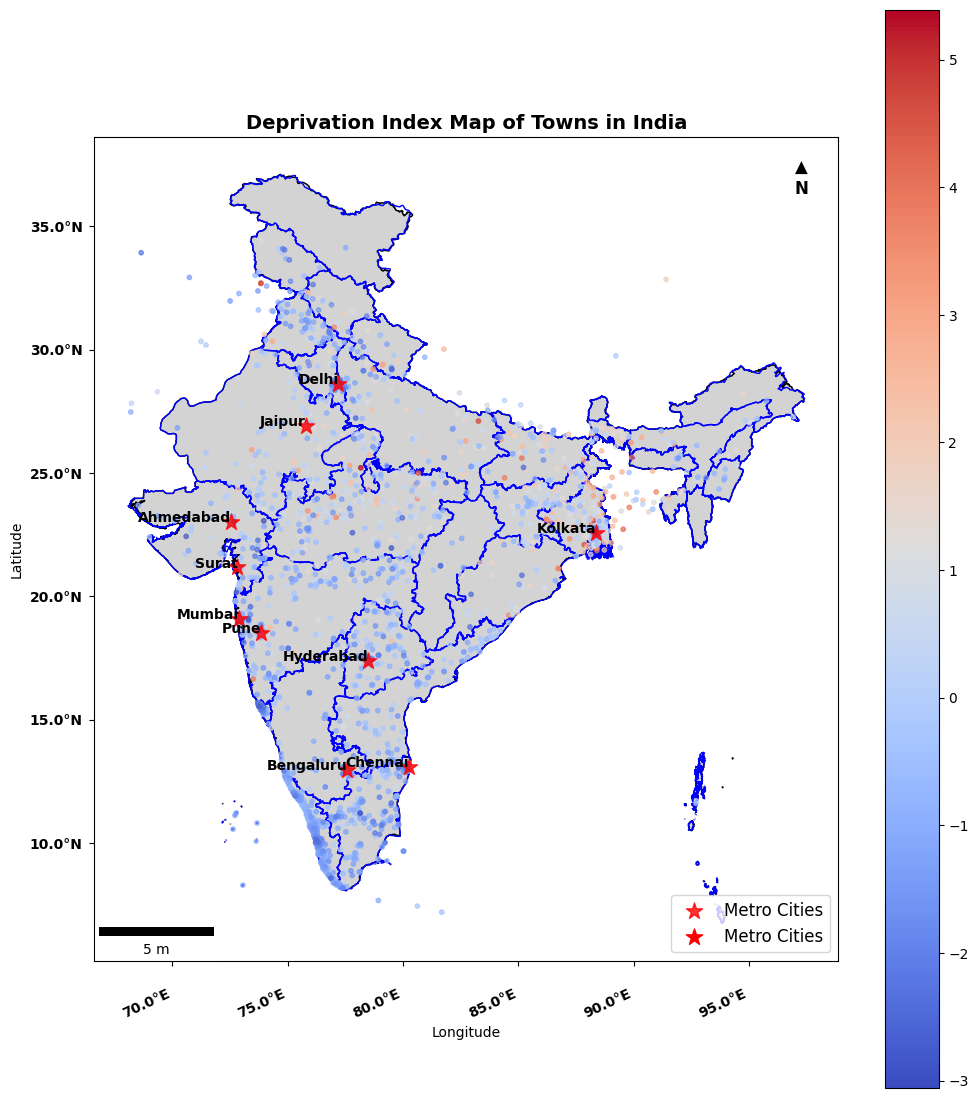

In [21]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import matplotlib.font_manager as fm
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.ticker as mticker

# Load India boundary & state boundary
india_boundary = gpd.read_file("India_Boundary.geojson")
state_boundaries = gpd.read_file("India_States.geojson")

# Load geocoded towns data
df = pd.read_csv("filtered_geocoded_data.csv")
df.rename(columns={'Index': 'deprivation_index'}, inplace=True)

# Convert towns data to a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Metro Cities Data
metro_data = {
    "City": ["Delhi", "Mumbai", "Kolkata", "Chennai", "Bengaluru", "Hyderabad", "Ahmedabad", "Pune", "Surat", "Jaipur"],
    "Latitude": [28.6139, 19.0760, 22.5726, 13.0827, 12.9716, 17.3850, 23.0225, 18.5204, 21.1702, 26.9124],
    "Longitude": [77.2090, 72.8777, 88.3639, 80.2707, 77.5946, 78.4867, 72.5714, 73.8567, 72.8311, 75.7873]
}
metro_df = pd.DataFrame(metro_data)
metro_geometry = [Point(xy) for xy in zip(metro_df['Longitude'], metro_df['Latitude'])]
metro_gdf = gpd.GeoDataFrame(metro_df, geometry=metro_geometry, crs="EPSG:4326")

# Plot the map
fig, ax = plt.subplots(figsize=(12, 14))  # Increased figure size for better spacing

# Plot boundaries
india_boundary.plot(ax=ax, color="lightgray", edgecolor="black", linewidth=1)
state_boundaries.plot(ax=ax, color="none", edgecolor="blue", linewidth=1, linestyle="-")

# Plot deprivation index towns
gdf.plot(ax=ax, column='deprivation_index', cmap='coolwarm', markersize=10, legend=True, alpha=0.7)

# Plot metro cities
metro_gdf.plot(ax=ax, marker='*', color='red', markersize=150, label="Metro Cities", alpha=0.8)

# Label metro cities
for idx, row in metro_df.iterrows():
    ax.text(row["Longitude"], row["Latitude"], row["City"], fontsize=10, color="black", ha="right", fontweight="bold")

# Add Legend for Metro Cities
plt.scatter([], [], color='red', marker='*', s=150, label="Metro Cities")
plt.legend(loc="lower right", fontsize=12, frameon=True)

# Format longitude labels with extra spacing
def format_longitude(x, pos):
    if x > 0:
        return f"{abs(x)}°E"
    elif x < 0:
        return f"{abs(x)}°W"
    return f"{abs(x)}°"

# Format latitude labels
def format_latitude(y, pos):
    if y > 0:
        return f"{abs(y)}°N"
    elif y < 0:
        return f"{abs(y)}°S"
    return f"{abs(y)}°"

# Apply latitude/longitude labels with increased spacing and rotation
ax.xaxis.set_major_locator(mticker.MultipleLocator(5))  # Increased spacing for longitude labels
ax.yaxis.set_major_locator(mticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(mticker.FuncFormatter(format_longitude))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_latitude))

# Rotate longitude labels and adjust padding
plt.xticks(rotation=25, ha="right", fontsize=10, fontweight="bold")  # Rotate labels for better spacing
plt.yticks(fontsize=10, fontweight="bold")

ax.tick_params(axis="x", pad=15)  # Increase padding for longitude labels
ax.tick_params(axis="y", pad=5)   # Increase padding for latitude labels

# Remove default grid
ax.grid(False)

# Add labels
font = fm.FontProperties(weight='bold')
plt.title("Deprivation Index Map of Towns in India", fontproperties=font, fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Add north arrow
ax.text(0.95, 0.95, u'\u25B2\nN', transform=ax.transAxes, ha='center', va='center', fontsize=12, fontweight='bold')

# Add scale bar
scalebar = ScaleBar(1, location='lower left')
ax.add_artist(scalebar)

# Save high-resolution map
pdf_path = "/mnt/data/deprivation_index_map.pdf"
jpeg_path = "/mnt/data/deprivation_index_map.jpeg"
fig.savefig(pdf_path, format="pdf", dpi=600, bbox_inches="tight")
fig.savefig(jpeg_path, format="jpeg", dpi=600, bbox_inches="tight")

# Show the map
plt.show()

print("✅ Map saved as 'deprivation_index_map.pdf' and 'deprivation_index_map.jpeg'.")

# ---- DOWNLOAD CODE ----
try:
    from google.colab import files
    files.download(pdf_path)
    files.download(jpeg_path)
except ImportError:
    print("✅ Files saved locally. Manually download them from your working directory.")


In [23]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import matplotlib.font_manager as fm
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.ticker as mticker

# ... (rest of your code remains the same) ...

# Save high-resolution map
# Changed to save in current working directory
pdf_path = "deprivation_index_map.pdf"
jpeg_path = "deprivation_index_map.jpeg"
fig.savefig(pdf_path, format="pdf", dpi=600, bbox_inches="tight")
fig.savefig(jpeg_path, format="jpeg", dpi=600, bbox_inches="tight")

# ... (rest of your code remains the same) ...

/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/deprivation_index_map.pdf'

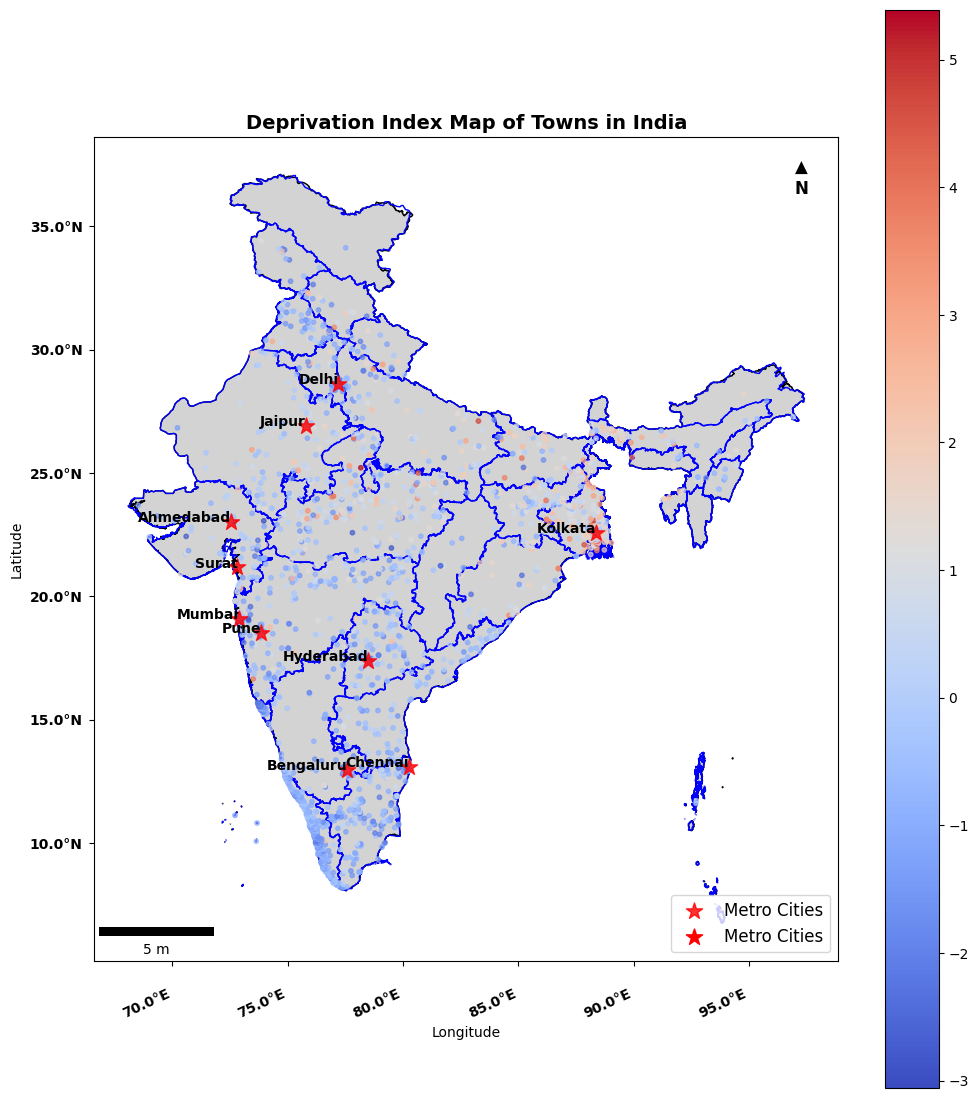

In [24]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import matplotlib.font_manager as fm
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.ticker as mticker

# Load India boundary & state boundary
india_boundary = gpd.read_file("India_Boundary.geojson")
state_boundaries = gpd.read_file("India_States.geojson")

# Load geocoded towns data
df = pd.read_csv("filtered_geocoded_data.csv")
df.rename(columns={'Index': 'deprivation_index'}, inplace=True)

# Convert towns data to a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# --- REMOVE POINTS OUTSIDE INDIA ---
gdf = gdf.clip(india_boundary)  # Keep only points inside the boundary

# Metro Cities Data
metro_data = {
    "City": ["Delhi", "Mumbai", "Kolkata", "Chennai", "Bengaluru", "Hyderabad", "Ahmedabad", "Pune", "Surat", "Jaipur"],
    "Latitude": [28.6139, 19.0760, 22.5726, 13.0827, 12.9716, 17.3850, 23.0225, 18.5204, 21.1702, 26.9124],
    "Longitude": [77.2090, 72.8777, 88.3639, 80.2707, 77.5946, 78.4867, 72.5714, 73.8567, 72.8311, 75.7873]
}
metro_df = pd.DataFrame(metro_data)
metro_geometry = [Point(xy) for xy in zip(metro_df['Longitude'], metro_df['Latitude'])]
metro_gdf = gpd.GeoDataFrame(metro_df, geometry=metro_geometry, crs="EPSG:4326")

# Plot the map
fig, ax = plt.subplots(figsize=(12, 14))  # Increased figure size for better spacing

# Plot boundaries
india_boundary.plot(ax=ax, color="lightgray", edgecolor="black", linewidth=1)
state_boundaries.plot(ax=ax, color="none", edgecolor="blue", linewidth=1, linestyle="-")

# Plot deprivation index towns
gdf.plot(ax=ax, column='deprivation_index', cmap='coolwarm', markersize=10, legend=True, alpha=0.7)

# Plot metro cities
metro_gdf.plot(ax=ax, marker='*', color='red', markersize=150, label="Metro Cities", alpha=0.8)

# Label metro cities
for idx, row in metro_df.iterrows():
    ax.text(row["Longitude"], row["Latitude"], row["City"], fontsize=10, color="black", ha="right", fontweight="bold")

# Add Legend for Metro Cities
plt.scatter([], [], color='red', marker='*', s=150, label="Metro Cities")
plt.legend(loc="lower right", fontsize=12, frameon=True)

# Format longitude labels with extra spacing
def format_longitude(x, pos):
    if x > 0:
        return f"{abs(x)}°E"
    elif x < 0:
        return f"{abs(x)}°W"
    return f"{abs(x)}°"

# Format latitude labels
def format_latitude(y, pos):
    if y > 0:
        return f"{abs(y)}°N"
    elif y < 0:
        return f"{abs(y)}°S"
    return f"{abs(y)}°"

# Apply latitude/longitude labels with increased spacing and rotation
ax.xaxis.set_major_locator(mticker.MultipleLocator(5))  # Increased spacing for longitude labels
ax.yaxis.set_major_locator(mticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(mticker.FuncFormatter(format_longitude))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_latitude))

# Rotate longitude labels and adjust padding
plt.xticks(rotation=25, ha="right", fontsize=10, fontweight="bold")  # Rotate labels for better spacing
plt.yticks(fontsize=10, fontweight="bold")

ax.tick_params(axis="x", pad=15)  # Increase padding for longitude labels
ax.tick_params(axis="y", pad=5)   # Increase padding for latitude labels

# Remove default grid
ax.grid(False)

# Add labels
font = fm.FontProperties(weight='bold')
plt.title("Deprivation Index Map of Towns in India", fontproperties=font, fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Add north arrow
ax.text(0.95, 0.95, u'\u25B2\nN', transform=ax.transAxes, ha='center', va='center', fontsize=12, fontweight='bold')

# Add scale bar
scalebar = ScaleBar(1, location='lower left')
ax.add_artist(scalebar)

# Save high-resolution map
pdf_path = "/mnt/data/deprivation_index_map.pdf"
jpeg_path = "/mnt/data/deprivation_index_map.jpeg"
fig.savefig(pdf_path, format="pdf", dpi=600, bbox_inches="tight")
fig.savefig(jpeg_path, format="jpeg", dpi=600, bbox_inches="tight")

# Show the map
plt.show()

print("✅ Map saved as 'deprivation_index_map.pdf' and 'deprivation_index_map.jpeg'.")

# ---- DOWNLOAD CODE ----
try:
    from google.colab import files
    files.download(pdf_path)
    files.download(jpeg_path)
except ImportError:
    print("✅ Files saved locally. Manually download them from your working directory.")


<ipython-input-25-2b964cad994e>:31: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = ax.get_legend_handles_labels()


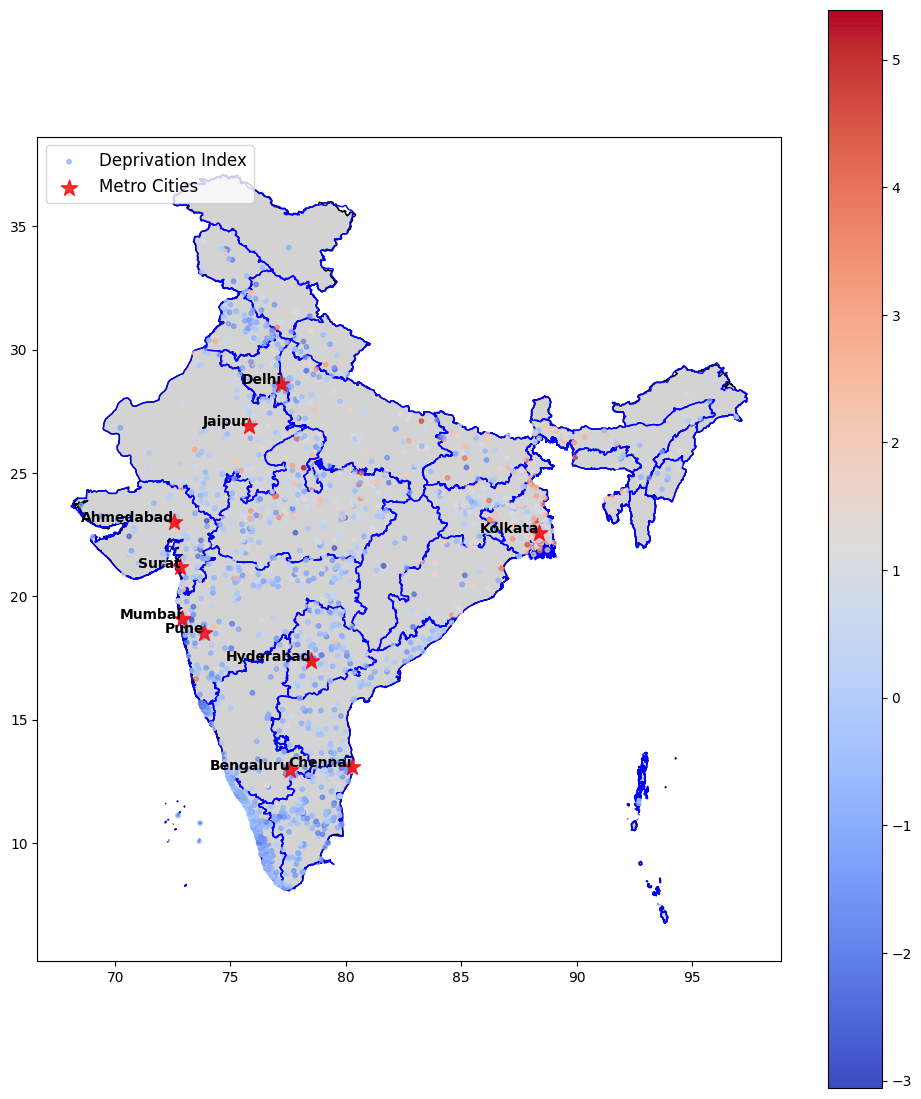

In [25]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import matplotlib.font_manager as fm
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.ticker as mticker

# ... (rest of your code remains the same) ...

# Plot the map
fig, ax = plt.subplots(figsize=(12, 14))  # Increased figure size for better spacing

# Plot boundaries
india_boundary.plot(ax=ax, color="lightgray", edgecolor="black", linewidth=1, label="India Boundary")  # Add label for India boundary
state_boundaries.plot(ax=ax, color="none", edgecolor="blue", linewidth=1, linestyle="-", label="State Boundaries")  # Add label for state boundaries

# Plot deprivation index towns
gdf.plot(ax=ax, column='deprivation_index', cmap='coolwarm', markersize=10, legend=True, alpha=0.7, label="Deprivation Index")  # Add label for deprivation index

# Plot metro cities
metro_gdf.plot(ax=ax, marker='*', color='red', markersize=150, alpha=0.8, label="Metro Cities")  # Add label for metro cities

# Label metro cities
for idx, row in metro_df.iterrows():
    ax.text(row["Longitude"], row["Latitude"], row["City"], fontsize=10, color="black", ha="right", fontweight="bold")

# ... (rest of your code remains the same) ...

# Add legend in the upper left corner
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc="upper left", fontsize=12, frameon=True)  # Combine all legend entries and place in upper left

# ... (rest of your code remains the same) ...

/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


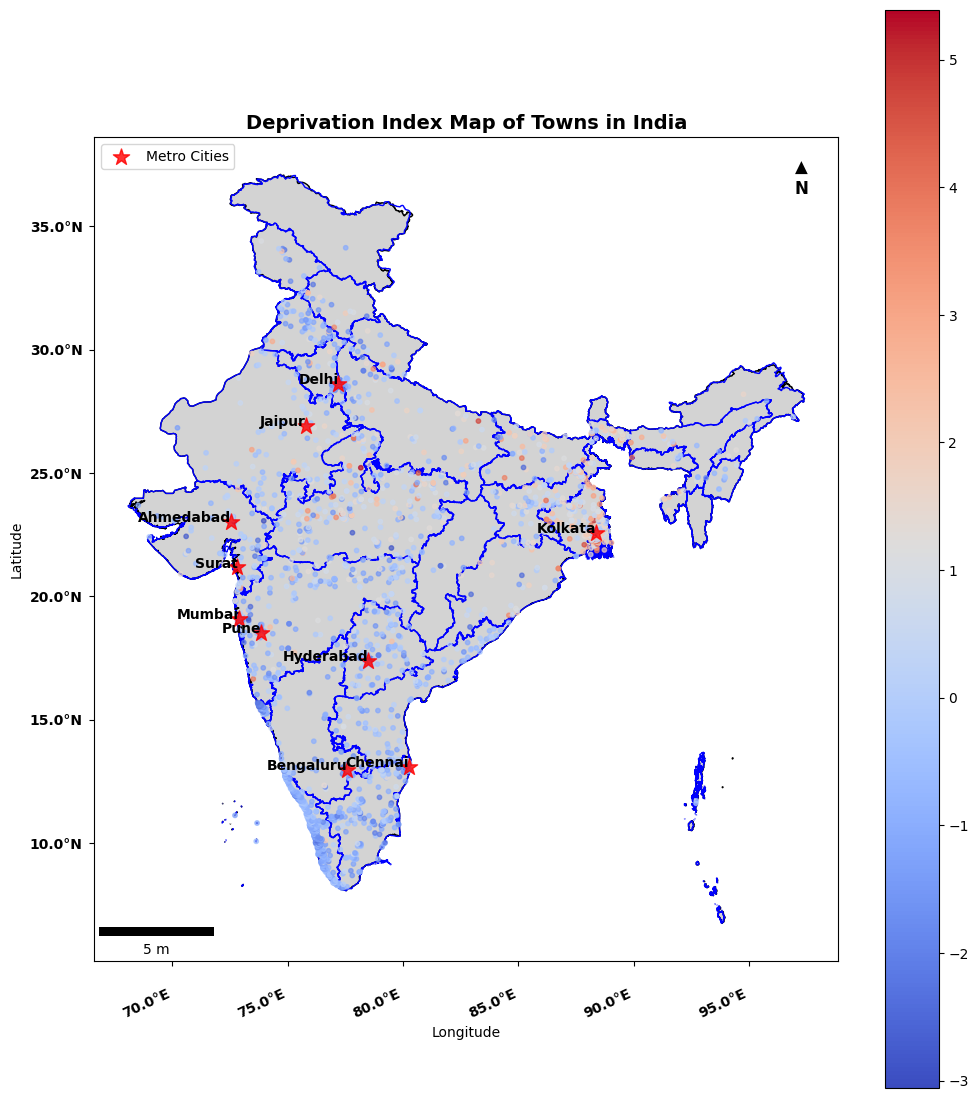

✅ Map saved as 'deprivation_index_map.pdf' and 'deprivation_index_map.jpeg'.


In [26]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import matplotlib.font_manager as fm
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.ticker as mticker

# Load India boundary & state boundary
india_boundary = gpd.read_file("India_Boundary.geojson")
state_boundaries = gpd.read_file("India_States.geojson")

# Load geocoded towns data
df = pd.read_csv("filtered_geocoded_data.csv")
df.rename(columns={'Index': 'deprivation_index'}, inplace=True)

# Convert towns data to a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# --- REMOVE POINTS OUTSIDE INDIA ---
gdf = gdf.clip(india_boundary)  # Keep only points inside the boundary

# Metro Cities Data
metro_data = {
    "City": ["Delhi", "Mumbai", "Kolkata", "Chennai", "Bengaluru", "Hyderabad", "Ahmedabad", "Pune", "Surat", "Jaipur"],
    "Latitude": [28.6139, 19.0760, 22.5726, 13.0827, 12.9716, 17.3850, 23.0225, 18.5204, 21.1702, 26.9124],
    "Longitude": [77.2090, 72.8777, 88.3639, 80.2707, 77.5946, 78.4867, 72.5714, 73.8567, 72.8311, 75.7873]
}
metro_df = pd.DataFrame(metro_data)
metro_geometry = [Point(xy) for xy in zip(metro_df['Longitude'], metro_df['Latitude'])]
metro_gdf = gpd.GeoDataFrame(metro_df, geometry=metro_geometry, crs="EPSG:4326")

# Plot the map
fig, ax = plt.subplots(figsize=(12, 14))  # Increased figure size for better spacing

# Plot boundaries
india_boundary.plot(ax=ax, color="lightgray", edgecolor="black", linewidth=1)
state_boundaries.plot(ax=ax, color="none", edgecolor="blue", linewidth=1, linestyle="-")

# Plot deprivation index towns (after clipping)
gdf.plot(ax=ax, column='deprivation_index', cmap='coolwarm', markersize=10, legend=True, alpha=0.7)

# Plot metro cities
metro_gdf.plot(ax=ax, marker='*', color='red', markersize=150, label="Metro Cities", alpha=0.8)

# Label metro cities
for idx, row in metro_df.iterrows():
    ax.text(row["Longitude"], row["Latitude"], row["City"], fontsize=10, color="black", ha="right", fontweight="bold")

# Format longitude labels with extra spacing
def format_longitude(x, pos):
    if x > 0:
        return f"{abs(x)}°E"
    elif x < 0:
        return f"{abs(x)}°W"
    return f"{abs(x)}°"

# Format latitude labels
def format_latitude(y, pos):
    if y > 0:
        return f"{abs(y)}°N"
    elif y < 0:
        return f"{abs(y)}°S"
    return f"{abs(y)}°"

# Apply latitude/longitude labels with increased spacing and rotation
ax.xaxis.set_major_locator(mticker.MultipleLocator(5))  # Increased spacing for longitude labels
ax.yaxis.set_major_locator(mticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(mticker.FuncFormatter(format_longitude))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_latitude))

# Rotate longitude labels and adjust padding
plt.xticks(rotation=25, ha="right", fontsize=10, fontweight="bold")  # Rotate labels for better spacing
plt.yticks(fontsize=10, fontweight="bold")

ax.tick_params(axis="x", pad=15)  # Increase padding for longitude labels
ax.tick_params(axis="y", pad=5)   # Increase padding for latitude labels

# Remove default grid
ax.grid(False)

# Add labels
font = fm.FontProperties(weight='bold')
plt.title("Deprivation Index Map of Towns in India", fontproperties=font, fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Add north arrow
ax.text(0.95, 0.95, u'\u25B2\nN', transform=ax.transAxes, ha='center', va='center', fontsize=12, fontweight='bold')

# Add scale bar
scalebar = ScaleBar(1, location='lower left')
ax.add_artist(scalebar)

# Save high-resolution map
fig.savefig("deprivation_index_map.pdf", format="pdf", dpi=600, bbox_inches="tight")
fig.savefig("deprivation_index_map.jpeg", format="jpeg", dpi=600, bbox_inches="tight")

# Add legend
plt.legend()

# Show the map
plt.show()

print("✅ Map saved as 'deprivation_index_map.pdf' and 'deprivation_index_map.jpeg'.")


In [29]:
# Add legend before saving
legend = ax.legend(loc='upper left', fontsize=10)
legend.get_title().set_fontsize(12)  # Increase legend title font size

# Save high-resolution map with legend
fig.savefig("deprivation_index_map.pdf", format="pdf", dpi=600, bbox_inches="tight")
fig.savefig("deprivation_index_map.jpeg", format="jpeg", dpi=600, bbox_inches="tight")

# Now, download the files in Colab
from google.colab import files
files.download("deprivation_index_map.pdf")
files.download("deprivation_index_map.jpeg")


/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib_scalebar/scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>